<a href="https://colab.research.google.com/github/Aryan-Gupta2002/Deep-Learning---Tensorflow/blob/main/neuralNetworkForRegression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neural Network for regression with larger Dataset

In [1]:
#Importing required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Dataset link : https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv

In [2]:
#Reading the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The Non-numerical columns needs to be converted into tensors(numerical) by Encoding method.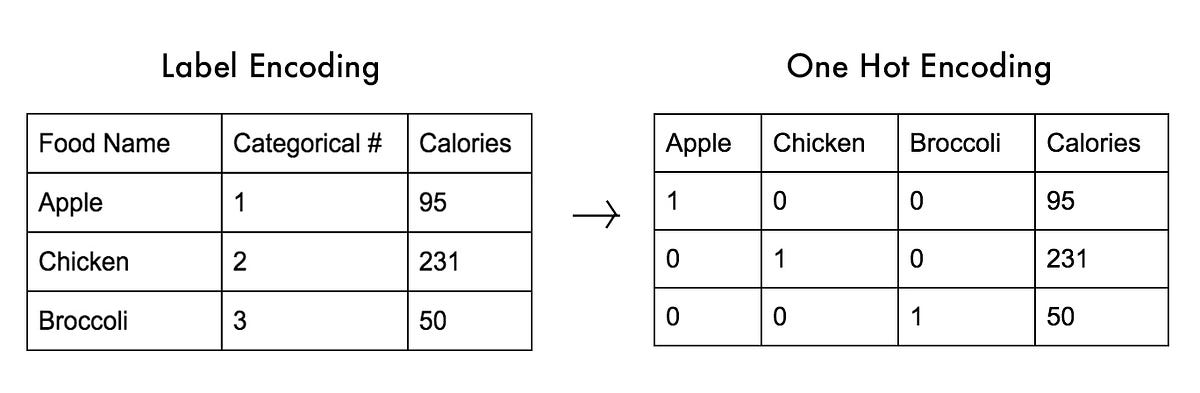  
image address : https://miro.medium.com/v2/resize:fit:1200/0*T5jaa2othYfXZX9W.

In [3]:
#Let's One Hot encode insurance dataset
insuranceOneHot=pd.get_dummies(insurance,dtype=int)
insuranceOneHot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
features=insuranceOneHot.drop("charges",axis=1)
features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [5]:
labels=insuranceOneHot["charges"]
labels.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [6]:
# Splitting dataset into training and testing (80:20)
# train_test_split shuffles our dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=42)


In [7]:
len(x_train),len(x_test)

(1070, 268)

In [8]:
x_train.shape

(1070, 11)

In [9]:
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


Building a Neural Network Model

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10291.2510 - mse: 235540240.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7776.0269 - mse: 164719744.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7961.8174 - mse: 166496912.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7405.8511 - mse: 157799568.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7312.9238 - mse: 156133168.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7352.7090 - mse: 156149904.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7554.0938 - mse: 152538592.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7731.4717 - mse: 160267824.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7800.4346 - mse: 161822080.0000
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7666.6460 - mse: 164284208.0000
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7479.7788 - mse: 151823584.0

In [11]:
#Checking the result on testing data
model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8069.5449 - mse: 105570928.0000  


[8037.40966796875, 105800840.0]

Trying to improve our model  
1.Add extra layer, extra neurons in a layers  
2.Train longer  
3.Setting Neurons  
4.Change Optimizers

In [12]:
tf.random.set_seed(42)
model2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
model2.compile(
    loss = tf.keras.losses.mae,
    #optimizer= tf.keras.optimizers.SGD(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mse"]
)
model2.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13259.3467 - mse: 317326432.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13103.7656 - mse: 312954944.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12794.3535 - mse: 304426560.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12185.8848 - mse: 288252800.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11134.7227 - mse: 261720976.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9716.3242 - mse: 226265616.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8311.7129 - mse: 189260736.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7528.8076 - mse: 161912688.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7395.0317 - mse: 151779792.0000
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7367.0859 - mse: 149972512.0000
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7345.6582 - mse: 1501025

In [13]:
model2.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4946.7456 - mse: 97079880.0000   


[4803.4326171875, 96208472.0]

In [14]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse"]
)
losses_history=model3.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13285.5762 - mse: 318072512.0000
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13134.9775 - mse: 313847840.0000
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12832.1777 - mse: 305502592.0000
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12229.1270 - mse: 289455584.0000
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11184.8213 - mse: 262992368.0000
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9778.8350 - mse: 227571536.0000
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8382.2031 - mse: 190435456.0000
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7574.7529 - mse: 162322528.0000
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7429.8521 - mse: 151620800.0000
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7400.5513 - mse: 149466064.0000
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7378.8652 - mse: 1496859

Text(0, 0.5, 'loss')

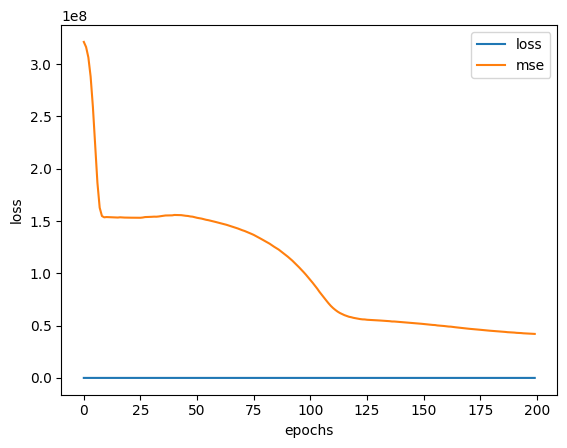

In [19]:
#Plotting Loss Curve (training curve)
pd.DataFrame(losses_history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

How many epochs you train for ?  
Soln: Tensorflow has a solution ! It's called the Early Stopping Callback which is a tensorflow component we can add to our model to stop training once it stops improving a certain metric. (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)